Exercise 3
1. Generate simulated values from the following distributions

     (a) Exponential distribution

     (b) Normal distribution (at least with standard Box-Mueller)

     (c) Pareto distribution, with β = 1 and experiment with
different values of k values: k = 2.05, k = 2.5, k = 3 and
k = 4.

Verify the results by comparing histograms with analytical
results and perform tests for distribution type.

2. For the Pareto distribution with support on [β,∞[ compare
mean value and variance, with analytical results, which can be
calculated as E(X) = β
k
k−1
(for k > 1) and
Var(X) = β
2 k
(k−1)2(k−2) (for k > 2). Explain problems if any.

3. For the normal distribution generate 100 95% confidence
intervals for the mean and variance, each based on 10
observations. Discuss the results.
4. Simulate from the Pareto distribution using composition

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from random import randrange
from math import log

# 1
# (a) Exponential distribution

In [13]:
def Exponential_distribution(sample_size, lam):
    exp = [-math.log(np.random.uniform(0,1,1)[0])/lam for x in range(sample_size)]
    return exp


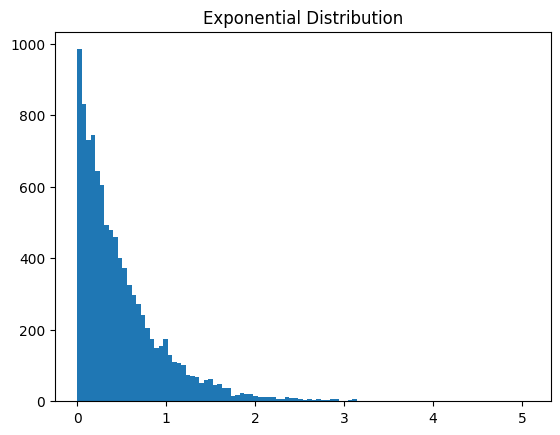

In [14]:
plt.hist(Exponential_distribution(10000,2),100)
plt.title('Exponential Distribution')
plt.show()

# b) Normal distribution 

In [21]:
from math import cos,pi
def normal_box_muler(sample_size):
    sample = [((-2*log(np.random.uniform(0,1,1)[0]))**(1/2))*cos(2*pi*np.random.uniform(0,1,1)[0]) for i in range(sample_size)]
    return sample

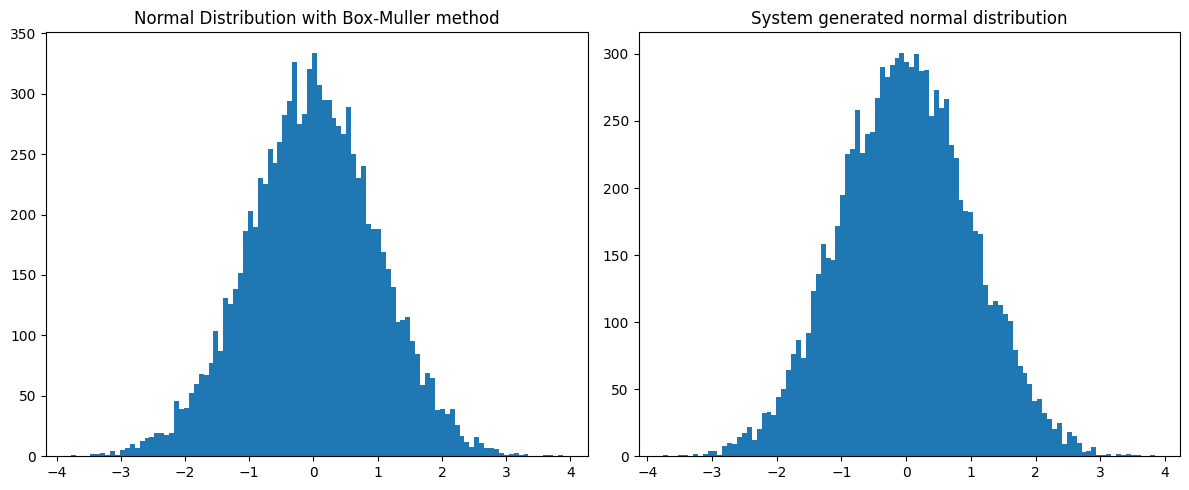

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
titles = ['Normal Distribution with Box-Muller method', 'System generated normal distribution']
axes[0].hist(normal_box_muler(10000),100)
axes[0].set_title(titles[0])
axes[1].hist(np.random.normal(0, 1, 10000),100)
axes[1].set_title(titles[1])

plt.tight_layout()
plt.show()

# (c) Pareto distribution

In [22]:
def pareto_distribution(k):
    beta = 1
    sample_size = 100000
    pareto = list()
    pareto = [beta*(np.random.uniform(0,1,1)[0]**(-1/k)) for x in range(sample_size)]
    return pareto

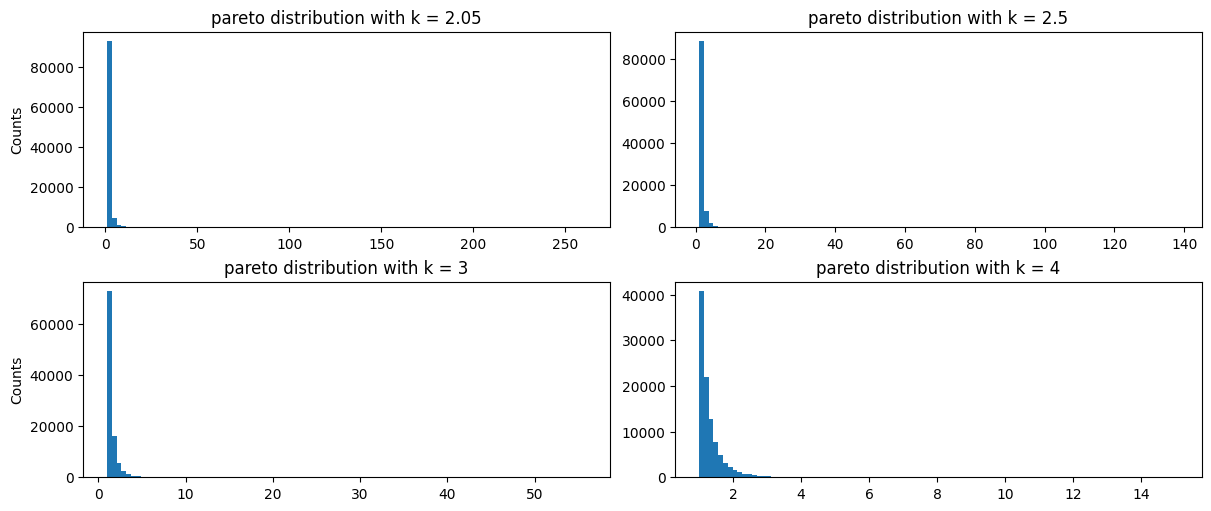

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), constrained_layout = True)
axes[0][0].hist(pareto_distribution(2.05), 100)
axes[0][0].set_title('pareto distribution with k = 2.05')
axes[0][0].set_ylabel('Counts')
axes[0][1].hist(pareto_distribution(2.5), 100)
axes[0][1].set_title('pareto distribution with k = 2.5')
axes[1][0].hist(pareto_distribution(3), 100)
axes[1][0].set_title('pareto distribution with k = 3')
axes[1][0].set_ylabel('Counts')
axes[1][1].hist(pareto_distribution(4), 100)
axes[1][1].set_title('pareto distribution with k = 4')
plt.show()

# 2

In [25]:
K = [2.05, 2.5, 3, 4]
B = 1
analitycal_mean = list()
analitycal_var = list()
for k in K:
    analitycal_mean.append(B*(k/(k-1)))
    analitycal_var.append((B**2)*(k/(((k-1)**2)*(k-2))))
    
our_mean = list()
our_var = list() 
for k in K:
    our_mean.append(np.mean(pareto_distribution(k)))
    our_var.append(np.var(pareto_distribution(k)))

    

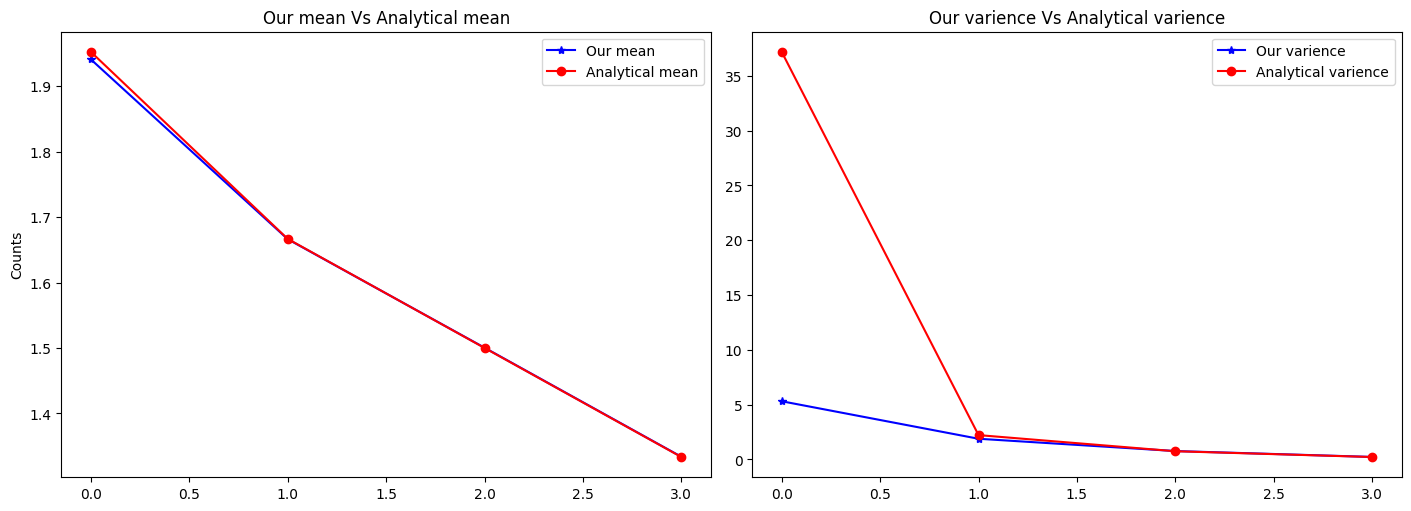

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), constrained_layout = True)
axes[0].plot(our_mean,color='blue', marker='*')
axes[0].plot(analitycal_mean, color='red', marker='o')
axes[0].legend(['Our mean', 'Analytical mean'])
axes[0].set_title('Our mean Vs Analytical mean')
axes[0].set_ylabel('Counts')
axes[1].plot(our_var,color='blue', marker='*')
axes[1].plot(analitycal_var, color='red', marker='o')
axes[1].legend(['Our varience', 'Analytical varience'])
axes[1].set_title('Our varience Vs Analytical varience')
plt.show()

# 3

In [37]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def var_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.var(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

ci_means = []
ci_means_down = []
ci_means_up = []
ci_vars = []
ci_vars_down = []
ci_vars_up = []
s = 10

for i in range(100):
    ci = mean_confidence_interval(normal[i*s:i*s+s])
    ci_means.append(ci[0])
    ci_means_down.append(ci[1])
    ci_means_up.append(ci[2])
    ci = var_confidence_interval(normal[i*s:i*s+s])
    ci_vars.append(ci[0])
    ci_vars_down.append(ci[1])
    ci_vars_up.append(ci[2])

# Plotting
x = np.linspace(0, 100, 100)
fig, ax = plt.subplots()
ax.plot(x, ci_means)
ax.fill_between(x, ci_means_down, ci_means_up, color='b', alpha=0.1)
ax.set_title('100 95% confidence intervals for the mean, each based on 10 observations')

fig, ax = plt.subplots()
ax.plot(x, ci_vars)
ax.fill_between(x, ci_vars_down, ci_vars_up, color='b', alpha=0.1)
ax.set_title('100 95% confidence intervals for the variance, each based on 10 observations')

plt.show()


NameError: name 'normal' is not defined

# 4

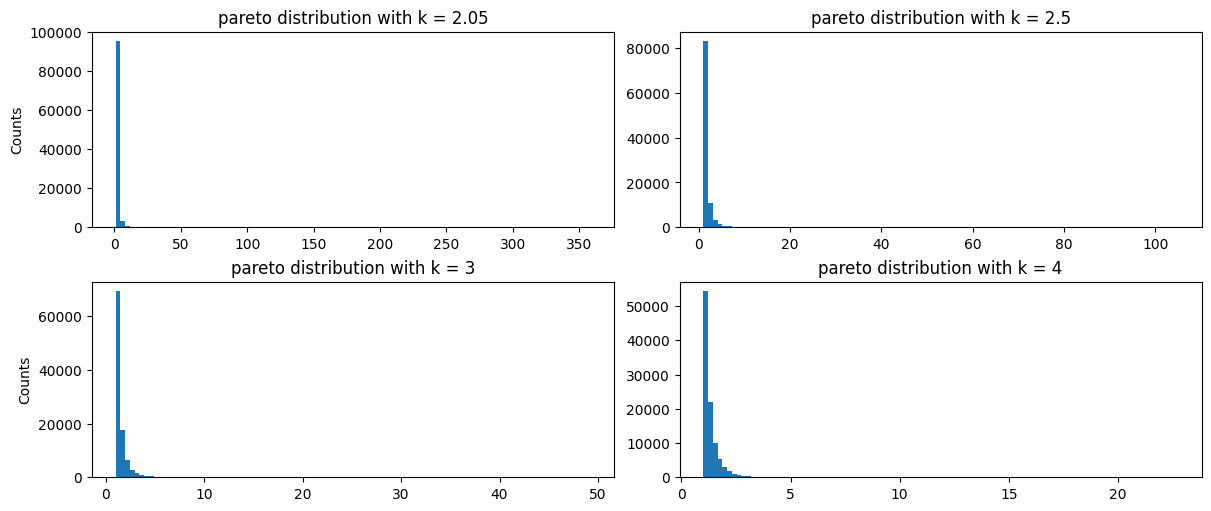

In [46]:
B = 1
K = [2.05, 2.5, 3, 4]
pareto = list()
for k in K:
    pareto.append([B*(x**(-1/k)-1) for x in range(1,10001)])

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), constrained_layout = True)
axes[0][0].hist(pareto_distribution(2.05), 100)
axes[0][0].set_title('pareto distribution with k = 2.05')
axes[0][0].set_ylabel('Counts')
axes[0][1].hist(pareto_distribution(2.5), 100)
axes[0][1].set_title('pareto distribution with k = 2.5')
axes[1][0].hist(pareto_distribution(3), 100)
axes[1][0].set_title('pareto distribution with k = 3')
axes[1][0].set_ylabel('Counts')
axes[1][1].hist(pareto_distribution(4), 100)
axes[1][1].set_title('pareto distribution with k = 4')
plt.show()

# Mean Varience composition

In [51]:

K = [2.05, 2.5, 3, 4]
B = 1
analitycal_mean = list()
analitycal_var = list()
for k in K:
    analitycal_mean.append(B*(k/(k-1)))
    analitycal_var.append((B**2)*(k/(((k-1)**2)*(k-2))))
    
mean = list()
varience = list() 
for dist in pareto:
    mean.append(np.mean(dist))
    varience.append(np.var(dist))

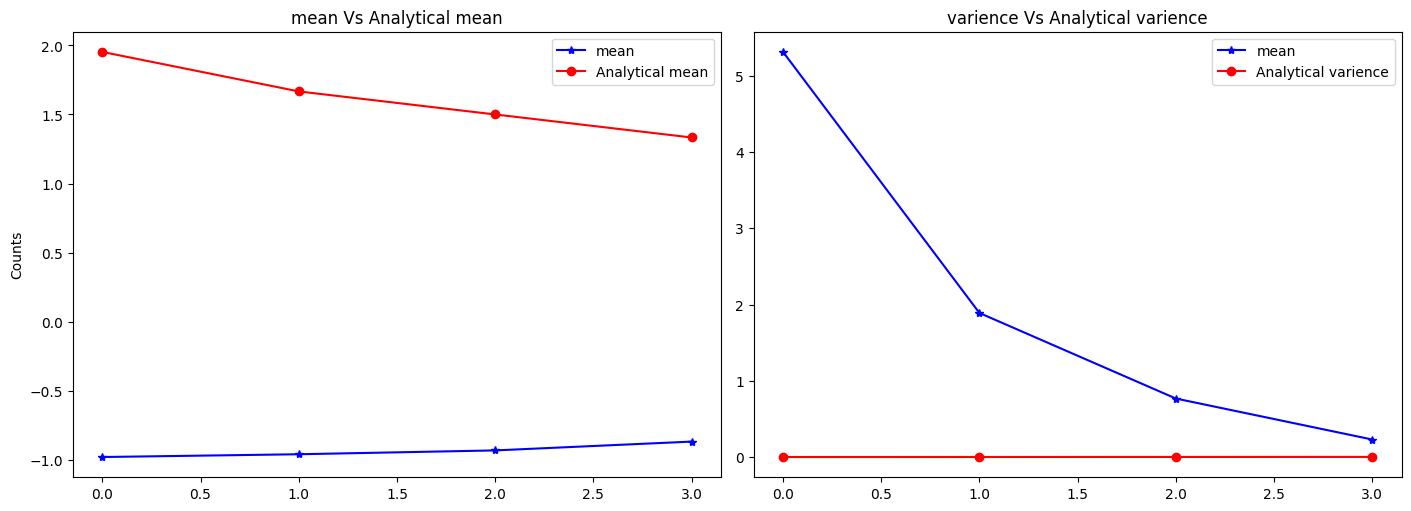

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), constrained_layout = True)
axes[0].plot(mean,color='blue', marker='*')
axes[0].plot(analitycal_mean, color='red', marker='o')
axes[0].legend(['mean', 'Analytical mean'])
axes[0].set_title('mean Vs Analytical mean')
axes[0].set_ylabel('Counts')
axes[1].plot(our_var,color='blue', marker='*')
axes[1].plot(varience, color='red', marker='o')
axes[1].legend(['mean', 'Analytical varience'])
axes[1].set_title('varience Vs Analytical varience')
plt.show()